### Instructions

You will be given a small dataset ***credit.csv*** with data of customers applying for a loan. The goal is to predict their defaulting behaviour. The data structure described in the Data section of this Document.

- Produce an exploratory data analysis on the provided dataset.
- Train a model to predict defaulting behaviour.
- The choice of scoring function(s) is free and must be justified.
- Evaluate and interpret your model, discuss the results.
- Estimate the business impact of using your model in decision-making.

### Data

The target is the variable **default**.

The data has the following structure:

- Observation_id: unique observation id.
- Checking_balance: Status of the existing checking account (German currency).
- Savings_balance: Savings account/bonds (German currency).
- Installment_rate: Installment rate in percentage of disposable income.
- Personal_status: Personal status and sex.
- Residence_history: Present residence since.
- Installment_plan: Other instalment plans.
- Existing_credits: Number of existing credits at this bank.
- Dependents: Number of people being liable to provide maintenance for.
- Default: 0 is a good loan, 1 is a defaulting one.
- Other columns are self-explanatory.

In [12]:
#load libaries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV # advanced scaling pipeline
from sklearn.pipeline import FeatureUnion, make_pipeline
from sklearn.linear_model import LogisticRegression #Classification
from sklearn.metrics import accuracy_score,f1_score, roc_auc_score, confusion_matrix, precision_score, recall_score, classification_report
import pickle

In [13]:

import pandas as pd

# File loading
df = pd.read_csv('https://raw.githubusercontent.com/simmieyungie/TAFM/refs/heads/main/credit.csv', index_col=0)

# Now you can work with the DataFrame 'df'
print(df.head())

   checking_balance  months_loan_duration credit_history    purpose  amount  \
0             -43.0                     6       critical   radio/tv    1169   
1              75.0                    48         repaid   radio/tv    5951   
2               NaN                    12       critical  education    2096   
3             -32.0                    42         repaid  furniture    7882   
4             -23.0                    24        delayed  car (new)    4870   

   savings_balance employment_length  installment_rate personal_status  \
0              NaN          13 years                 4          single   
1             89.0           2 years                 2             NaN   
2             24.0           5 years                 2          single   
3              9.0           5 years                 2          single   
4             43.0           3 years                 3          single   

  other_debtors  ... age installment_plan   housing existing_credits default  \


In [14]:

# data dimension
df.shape


(1000, 22)

In [15]:
#CHecks how many missing values are in a field and compute the % of missing values in another column of the same output

import pandas as pd
# Calculate the number of missing values in each column
missing_values = df.isnull().sum()

# Calculate the percentage of missing values in each column
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Combine the results into a single DataFrame
missing_data_summary = pd.DataFrame({'Missing Values': missing_values, 'Missing Percentage': missing_percentage})

# Display the summary
print(missing_data_summary)

                      Missing Values  Missing Percentage
checking_balance                 394                39.4
months_loan_duration               0                 0.0
credit_history                     0                 0.0
purpose                            0                 0.0
amount                             0                 0.0
savings_balance                  183                18.3
employment_length                 62                 6.2
installment_rate                   0                 0.0
personal_status                  310                31.0
other_debtors                      0                 0.0
residence_history                130                13.0
property                           0                 0.0
age                                0                 0.0
installment_plan                   0                 0.0
housing                            0                 0.0
existing_credits                   0                 0.0
default                        

In [16]:
#describe the data
df.describe()

,checking_balance,months_loan_duration,amount,savings_balance,installment_rate,age,existing_credits,default,dependents,telephone
count,606.000000,1000.000000,1000.000000,817.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,4.040000e+02
mean,97.245875,20.903000,3271.258000,781.570379,2.973000,35.546000,1.407000,0.300000,1.155000,2.344914e+09
std,206.923583,12.058814,2822.736876,3016.983785,1.118715,11.375469,0.577654,0.458487,0.362086,3.008193e+06
min,-50.000000,4.000000,250.000000,0.000000,1.000000,19.000000,1.000000,0.000000,1.000000,2.340000e+09
25%,-23.000000,12.000000,1365.500000,31.000000,2.000000,27.000000,1.000000,0.000000,1.000000,2.342211e+09
50%,24.000000,18.000000,2319.500000,64.000000,3.000000,33.000000,1.000000,0.000000,1.000000,2.344804e+09
75%,131.750000,24.000000,3972.250000,128.000000,4.000000,42.000000,2.000000,1.000000,1.000000,2.347731e+09
max,999.000000,72.000000,18424.000000,19972.000000,4.000000,75.000000,4.000000,1.000000,2.000000,2.349994e+09


# Exploratory Data Analysis and Visualizations

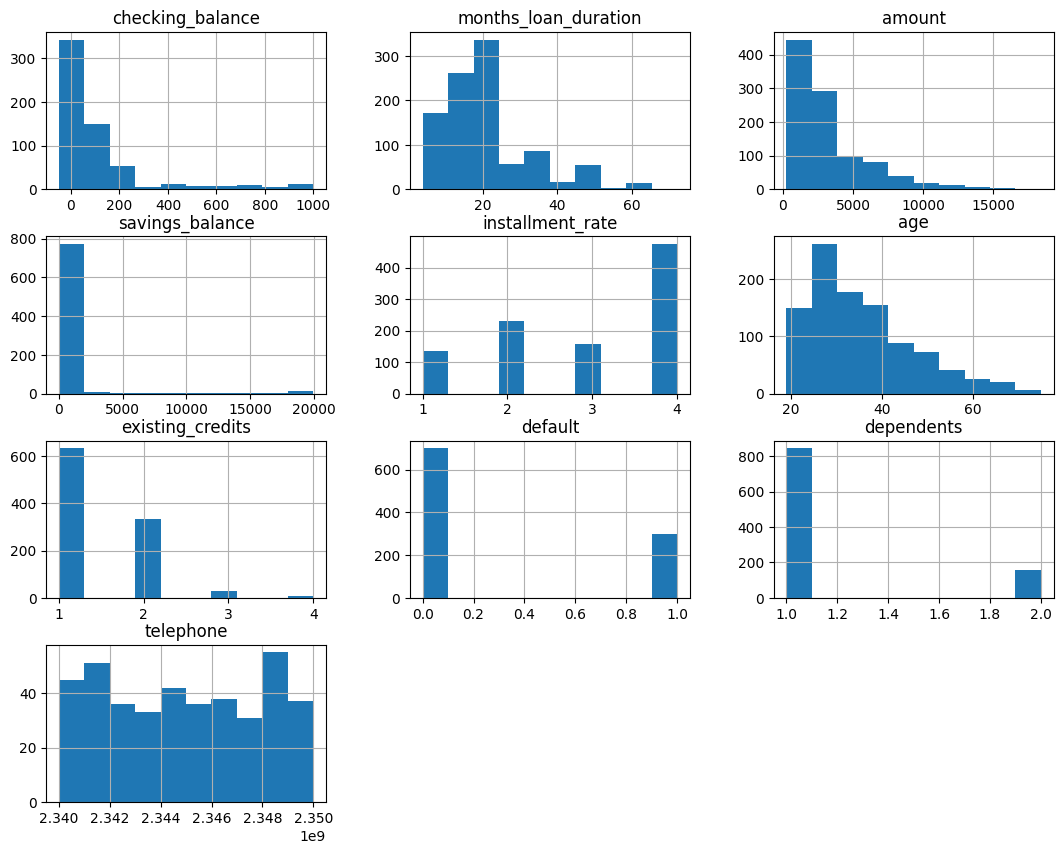

In [17]:
#Create a histogram of each column to examine data distribution
df.hist(figsize = (13, 10))
plt.show()

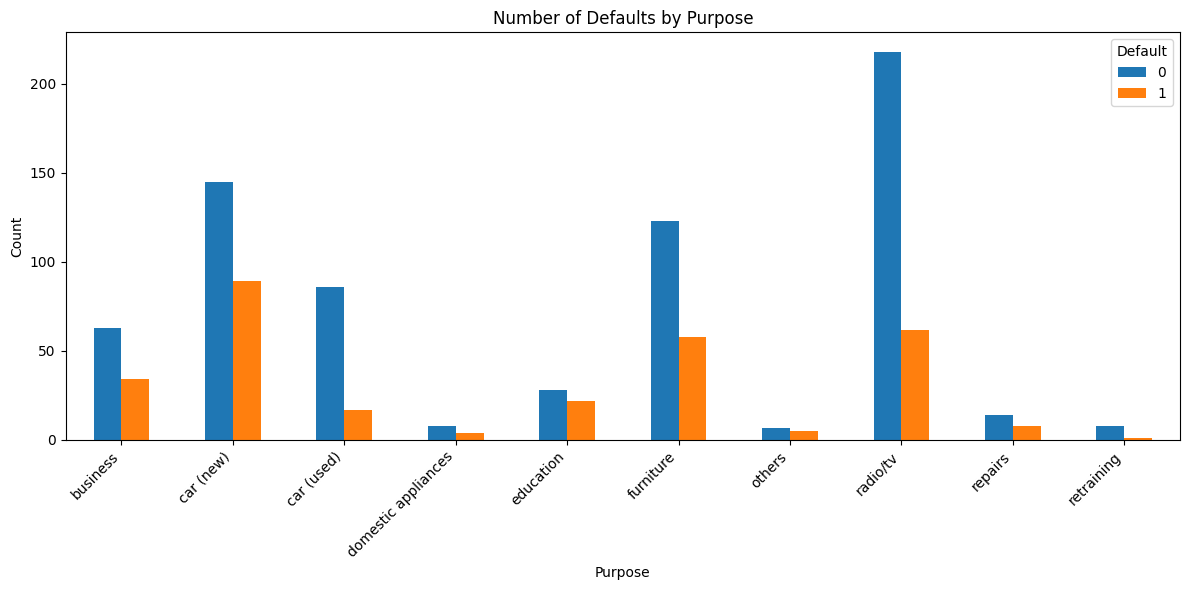

In [18]:
#Make a bar chart of purpose and default types

import matplotlib.pyplot as plt

# Group data by 'purpose' and count the number of 'default' for each purpose
purpose_default_counts = df.groupby('purpose')['default'].value_counts().unstack()

# Create a bar chart
purpose_default_counts.plot(kind='bar', figsize=(12, 6))
plt.title('Number of Defaults by Purpose')
plt.xlabel('Purpose')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Default')
plt.tight_layout()
plt.show()


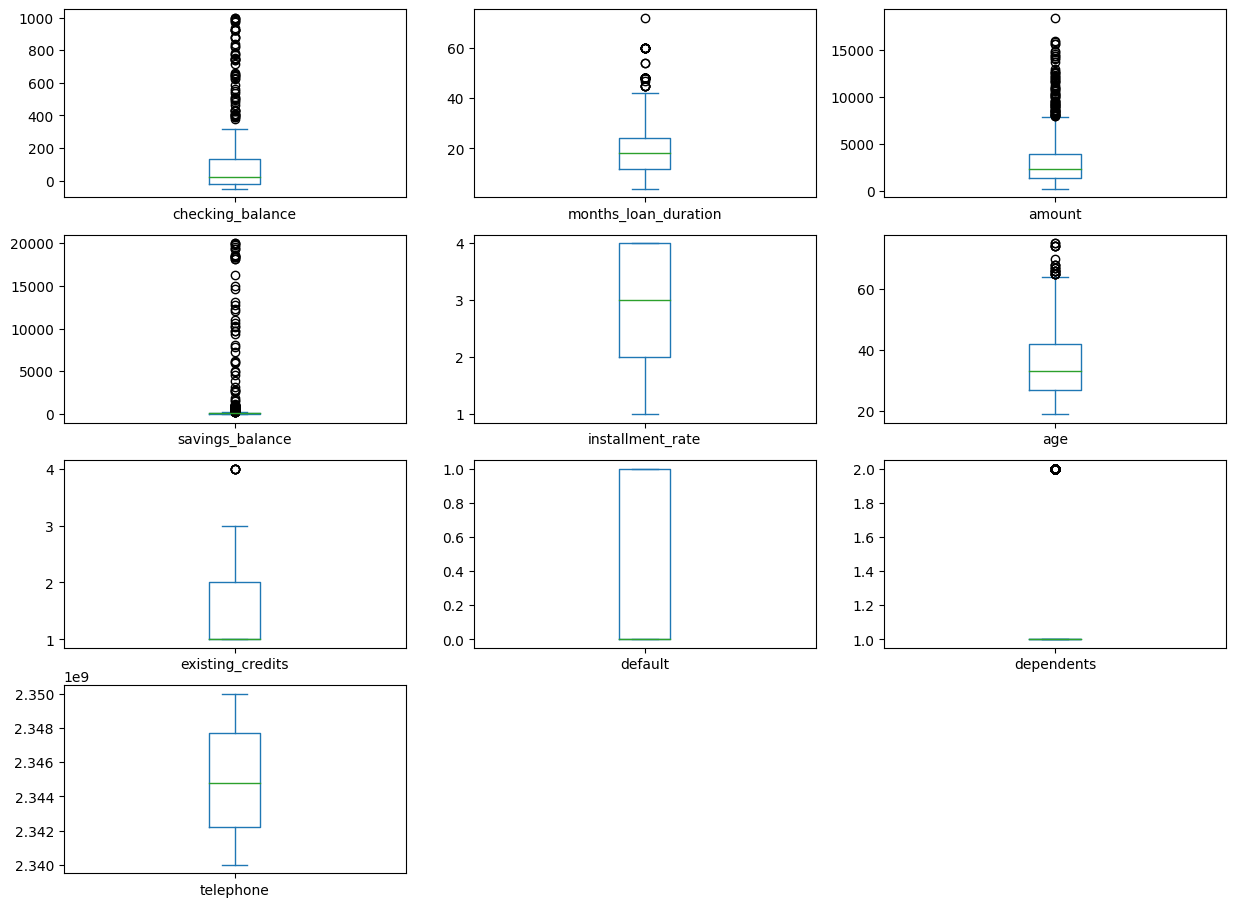

In [19]:
#Box plot of ALL NUMBERICAL COLUMNS
import matplotlib.pyplot as plt
import numpy as np
df.select_dtypes(include=np.number).plot(kind='box', subplots=True, layout=(7,3), figsize=(15, 20))
plt.show()


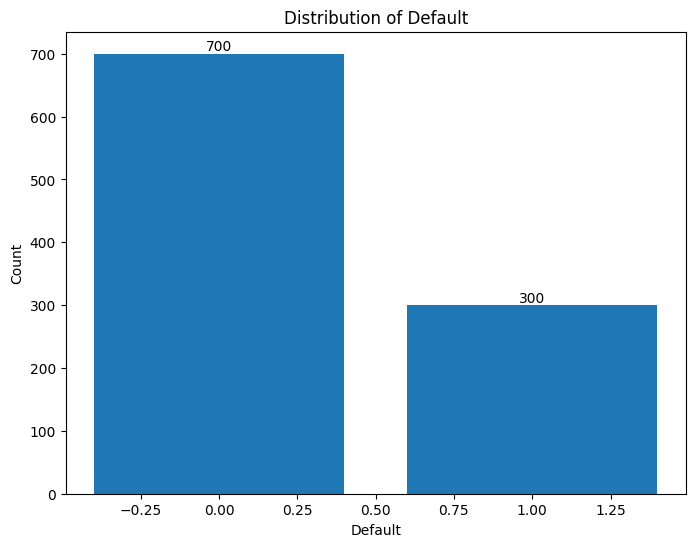

In [20]:
#  barchart of default column with the count labels

import matplotlib.pyplot as plt
# Group the data by 'default' and count the occurrences
default_counts = df['default'].value_counts()

# Create a bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(default_counts.index, default_counts.values)
plt.xlabel('Default')
plt.ylabel('Count')
plt.title('Distribution of Default')

# Add count labels above the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, yval, ha='center', va='bottom')

plt.show()


### Observations 1 - Distribution, Outliers
### **1. Data Distribution and Skewness**
* **checking_balance, amount, age:** These features show a right-skewed distribution. This means that there are many individuals with lower values (smaller checking balances, loan amounts, and younger ages) and fewer individuals with higher values.

* **months_loan_duration:** This appears to be somewhat normally distributed but with some peaks at certain loan durations (possibly due to standard loan terms offered by lenders).

* **savings_balance:** This also seems right-skewed, suggesting most individuals have lower savings balances.

* **installment_rate, existing_credits, dependents:** These features have more discrete distributions, likely because they take on a limited number of values (e.g., installment rates might be fixed percentages, and the number of existing credits or dependents is typically a whole number).

### **2. Potential Outliers**

* checking_balance, amount, age, savings_balance: The right-skewed distributions in these features suggest the presence of potential outliers

### **3. Class Imbalance (default)**

* The histogram for default shows a significant class imbalance. There are far more non-default cases (0) than default cases (1). This is a common issue in credit risk modeling and needs to be addressed during model training (e.g., using techniques like oversampling, undersampling, or cost-sensitive learning).



## Multivariate Analysis

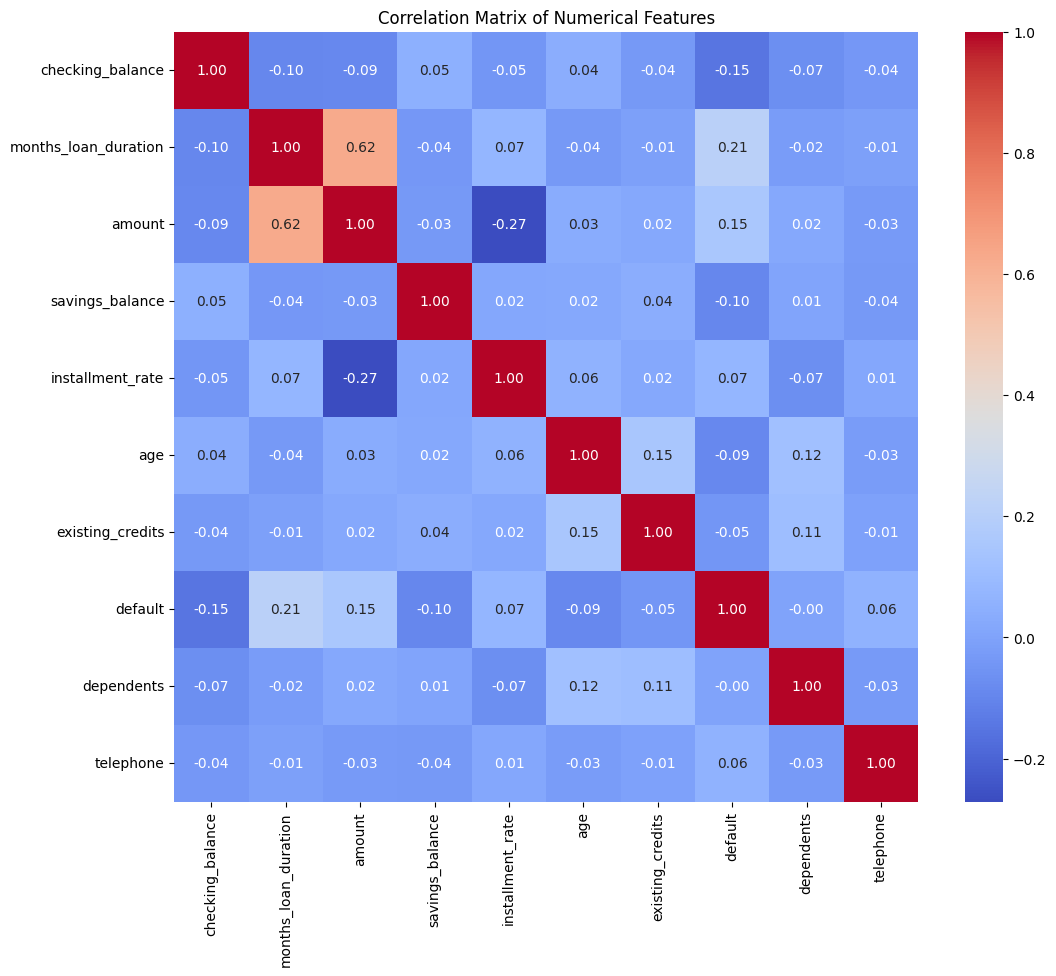

In [21]:
# prompt: Generate a seaborn heatmap of all numerical variables

import matplotlib.pyplot as plt
import numpy as np
# Create a correlation matrix for numerical features
correlation_matrix = df.select_dtypes(include=np.number).corr()

# Generate a heatmap using seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()


In [22]:
#Write a CHi Square test to examine the relation between categorical fields and default.
#Combine the results into a single dataframe.
#Add a conditional column that indicates if P value is > than 0.05 we accept the null which means no relationship else we reject

import pandas as pd
from scipy.stats import chi2_contingency

# Filter for categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Create an empty list to store the results
results = []

# Loop through each categorical column
for column in categorical_columns:
  # Create a contingency table
  contingency_table = pd.crosstab(df[column], df['default'])

  # Perform the chi-square test
  chi2, p_value, dof, expected = chi2_contingency(contingency_table)

  # Store the results in a dictionary
  result = {
      'Column': column,
      'Chi-Square Statistic': chi2,
      'P-value': p_value,
      'Degrees of Freedom': dof,
  }
  results.append(result)

# Convert the list of dictionaries to a DataFrame
chi_square_results_df = pd.DataFrame(results)

# Add a conditional column
chi_square_results_df['Relationship'] = chi_square_results_df['P-value'].apply(lambda x: 'Accept Null Hypothesis (No Relationship)' if x > 0.05 else 'Reject Null Hypothesis (Relationship Exists)')

# Print the results DataFrame
chi_square_results_df.head(len(categorical_columns))


,Column,Chi-Square Statistic,P-value,Degrees of Freedom,Relationship
0,credit_history,61.691397,1.279187e-12,4,Reject Null Hypothesis (Relationship Exists)
1,purpose,33.356447,1.157491e-04,9,Reject Null Hypothesis (Relationship Exists)
2,employment_length,44.263611,4.513110e-02,30,Reject Null Hypothesis (Relationship Exists)
3,personal_status,4.097540,1.288933e-01,2,Accept Null Hypothesis (No Relationship)
4,other_debtors,6.645367,3.605595e-02,2,Reject Null Hypothesis (Relationship Exists)
5,residence_history,34.296452,5.018903e-01,35,Accept Null Hypothesis (No Relationship)
6,property,23.719551,2.858442e-05,3,Reject Null Hypothesis (Relationship Exists)
7,installment_plan,12.839188,1.629318e-03,2,Reject Null Hypothesis (Relationship Exists)
8,housing,18.199842,1.116747e-04,2,Reject Null Hypothesis (Relationship Exists)
9,foreign_worker,5.821576,1.583075e-02,1,Reject Null Hypothesis (Relationship Exists)


### Observations 2 - Correlation and Hypothesis Tesing

### **1. Strongest Positive Correlations**

* **months_loan_duration and amount (0.62):** This suggests that longer loan durations are associated with larger loan amounts, which is quite intuitive.


### **2. Moderate Positive Correlations**
* **default and months_loan_duration (0.21):** Longer loan durations seem to be somewhat correlated with a higher likelihood of default. This could indicate that longer-term loans are riskier.

* **age and existing_credits (0.15):** Older individuals tend to have more existing credit accounts.
age and dependents (0.12): Older individuals are likely to have more dependents.

### **3. Weak Positive Correlations**
* Most other positive correlations are quite weak (close to 0), indicating little to no linear relationship between those pairs of variables.

### **4.  Negative Correlations**

* installment_rate and amount (-0.27): Higher installment rates are associated with lower loan amounts. This could reflect lenders offering lower rates for larger loans or borrowers being more cautious with larger loans, opting for lower rates.
* default and checking_balance (-0.15): Lower checking balances are weakly correlated with a higher likelihood of default. This makes sense as lower balances might indicate financial strain.

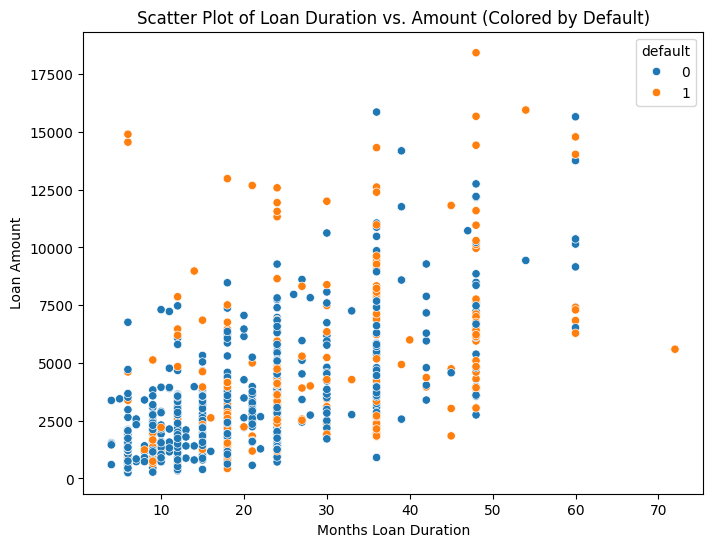

In [23]:
# prompt: Write a code to make a scatterplot of months_loan_duration vs. amount and default as the color code

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.scatterplot(x='months_loan_duration', y='amount', hue='default', data=df)
plt.title('Scatter Plot of Loan Duration vs. Amount (Colored by Default)')
plt.xlabel('Months Loan Duration')
plt.ylabel('Loan Amount')
plt.show()


### Observations 3 - Multivariate Analysis

### 1. Confirmation of Positive Correlation

* The plot clearly shows a positive correlation between months_loan_duration and amount. As the loan duration increases, the loan amount tends to increase as well. This confirms the strong positive correlation (0.62) observed in the correlation matrix.

### 2.  Distribution of Defaults

* Defaults (orange points) seem to be more spread out across the plot, while non-defaults (blue points) are more concentrated in the lower-left region (shorter durations and smaller amounts).
* There is a noticeable concentration of defaults in the upper-right quadrant (longer durations and larger amounts), suggesting that larger, longer-term loans might be riskier.

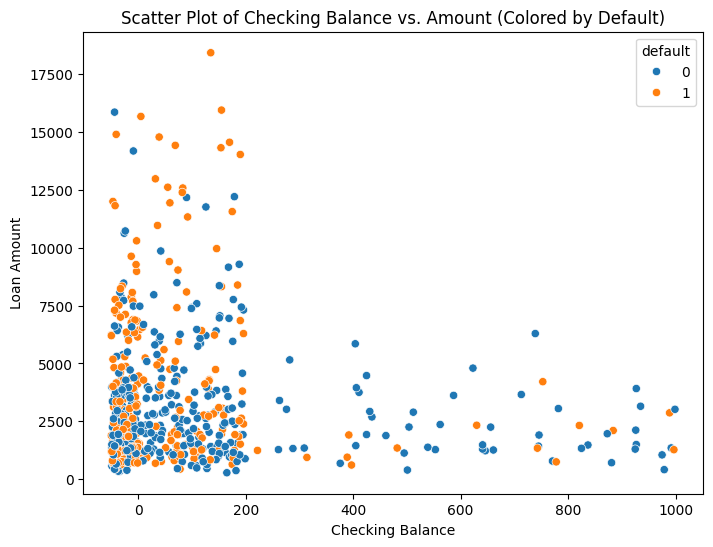

In [24]:
#Make a scatterplot of checking_balance vs amount with default as color code

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.scatterplot(x='checking_balance', y='amount', hue='default', data=df)
plt.title('Scatter Plot of Checking Balance vs. Amount (Colored by Default)')
plt.xlabel('Checking Balance')
plt.ylabel('Loan Amount')
plt.show()


### Observations 4 - Multivariate Analysis

1. Defaults (orange points) are more prevalent in the lower regions of the plot, where checking balances are lower. This suggests that individuals with lower checking balances might be more likely to default, regardless of the loan amount.
2. However, defaults are also present across the entire range of checking balances and loan amounts, indicating that other factors are also contributing to default risk.

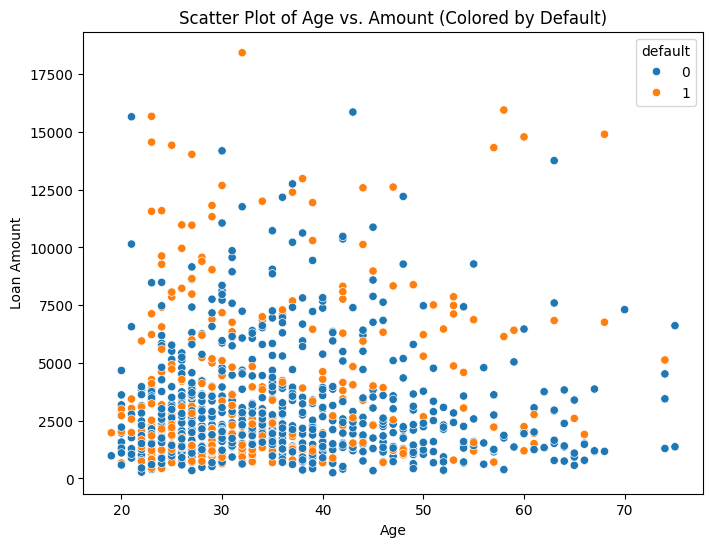

In [25]:
# Make a scatterplot of age vs amount with default as color code

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='amount', hue='default', data=df)
plt.title('Scatter Plot of Age vs. Amount (Colored by Default)')
plt.xlabel('Age')
plt.ylabel('Loan Amount')
plt.show()


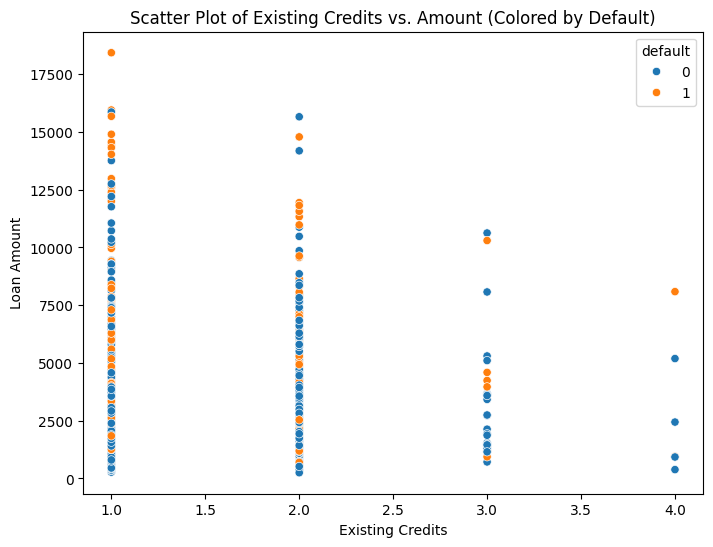

In [26]:
# prompt: Make a scatterplot of  existing_credits vs. amount with default as color code

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.scatterplot(x='existing_credits', y='amount', hue='default', data=df)
plt.title('Scatter Plot of Existing Credits vs. Amount (Colored by Default)')
plt.xlabel('Existing Credits')
plt.ylabel('Loan Amount')
plt.show()


In [27]:
#Examine the % of defaulters to non defaulters
df["default"].value_counts()/10000 * 100

,count
default,
0,7.0
1,3.0


# Data Cleaning and Tranformation

In [28]:
#if values in checking or savings is <= 50  then average, less than <= 200 then moderate > 200 rich and nas as others.

import pandas as pd
# Create a copy of the original DataFrame to avoid modifying it directly
df_v4 = df.copy()

# Define a function to categorize checking and savings balances
def categorize_balance(balance):
  if pd.isnull(balance):
    return 'Others'
  elif balance <= 50:
    return 'Average'
  elif balance <= 200:
    return 'Moderate'
  else:
    return 'Rich'

# Apply the function to the 'checking_balance' and 'savings_balance' columns
df_v4['checking_balance'] = df_v4['checking_balance'].apply(categorize_balance)
df_v4['savings_balance'] = df_v4['savings_balance'].apply(categorize_balance)

# Print the updated DataFrame (optional)
df_v4.head()


,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,...,age,installment_plan,housing,existing_credits,default,dependents,telephone,foreign_worker,job,gender
0,Average,6,critical,radio/tv,1169,Others,13 years,4,single,none,...,67,none,own,2,0,1,2.349340e+09,yes,skilled employee,male
1,Moderate,48,repaid,radio/tv,5951,Moderate,2 years,2,NaN,none,...,22,none,own,1,1,1,NaN,yes,skilled employee,female
2,Others,12,critical,education,2096,Average,5 years,2,single,none,...,49,none,own,1,0,2,NaN,yes,unskilled resident,male
3,Average,42,repaid,furniture,7882,Average,5 years,2,single,guarantor,...,45,none,for free,1,0,2,NaN,yes,skilled employee,male
4,Average,24,delayed,car (new),4870,Average,3 years,3,single,none,...,53,none,for free,2,1,2,NaN,yes,skilled employee,male


In [29]:
df_v4.isnull().sum()

,0
checking_balance,0
months_loan_duration,0
credit_history,0
purpose,0
amount,0
savings_balance,0
employment_length,62
installment_rate,0
personal_status,310
other_debtors,0


In [30]:
# DROP COLUMNS WITH MISSING VALUES

df_v4 = df_v4.dropna(axis=1)


In [31]:

# Encode all columns of categorical types in the df_new dataframe

import pandas as pd
# Loop through each categorical column and perform one-hot encoding
for column in df_v4.select_dtypes(include=['object']).columns:
  df_v4 = pd.get_dummies(df_v4, columns=[column], prefix=[column], dummy_na=False, drop_first=True)

df_v4.head()

,months_loan_duration,amount,installment_rate,age,existing_credits,default,dependents,checking_balance_Moderate,checking_balance_Others,checking_balance_Rich,...,property_unknown/none,installment_plan_none,installment_plan_stores,housing_own,housing_rent,foreign_worker_yes,job_skilled employee,job_unemployed non-resident,job_unskilled resident,gender_male
0,6,1169,4,67,2,0,1,False,False,False,...,False,True,False,True,False,True,True,False,False,True
1,48,5951,2,22,1,1,1,True,False,False,...,False,True,False,True,False,True,True,False,False,False
2,12,2096,2,49,1,0,2,False,True,False,...,False,True,False,True,False,True,False,False,True,True
3,42,7882,2,45,1,0,2,False,False,False,...,False,True,False,False,False,True,True,False,False,True
4,24,4870,3,53,2,1,2,False,False,False,...,True,True,False,False,False,True,True,False,False,True


# Model Building


#### Experiment 1: Build an Ensemble Model

In [32]:
#BUILD AND EVALUATE A LOGREG and 5 other models. Compile the core evaluation metrics in a datarfame

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

# Define features (X) and target (y)
X = df_v4.drop('default', axis=1)
y = df_v4['default']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Random Forest': RandomForestClassifier()
}

results = []

for model_name, model in models.items():
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  roc_auc = roc_auc_score(y_test, y_pred)

  results.append([model_name, accuracy, precision, recall, f1, roc_auc])


results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC'])

print(results_df)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                    Model  Accuracy  Precision    Recall  F1-Score   ROC AUC
0     Logistic Regression  0.733333   0.596491  0.373626  0.459459  0.631789
1           Decision Tree  0.653333   0.425287  0.406593  0.415730  0.583679
2  Support Vector Machine  0.713333   1.000000  0.054945  0.104167  0.527473
3     K-Nearest Neighbors  0.646667   0.368421  0.230769  0.283784  0.529260
4             Naive Bayes  0.733333   0.566265  0.516484  0.540230  0.672117
5           Random Forest  0.740000   0.651163  0.307692  0.417910  0.617961


#### Experiment 2: Build a Logistic Regression Model

Accuracy: 0.795
F1 Score: 0.616822429906542
Precision: 0.6875
Recall: 0.559322033898305
AUC Score: 0.7264695275874503
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       141
           1       0.69      0.56      0.62        59

    accuracy                           0.80       200
   macro avg       0.76      0.73      0.74       200
weighted avg       0.79      0.80      0.79       200



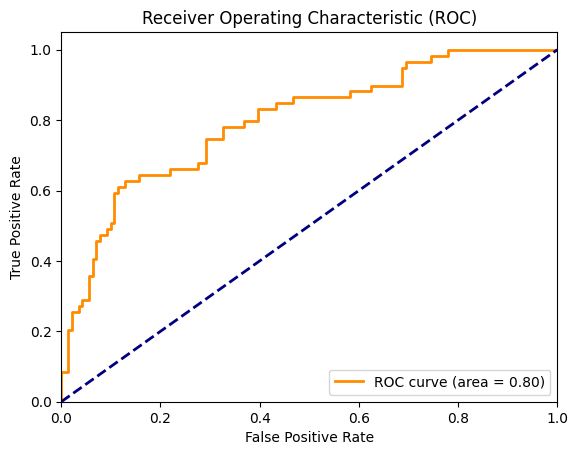

In [33]:
#Build a LogReg Model and then make a plot roc

import matplotlib.pyplot as plt
# Split data into features (X) and target (y)
X = df_v4.drop('default', axis=1)
y = df_v4['default']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with StandardScaler and LogisticRegression
pipeline = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("AUC Score:", roc_auc_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Plot ROC curve
from sklearn.metrics import roc_curve, auc
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


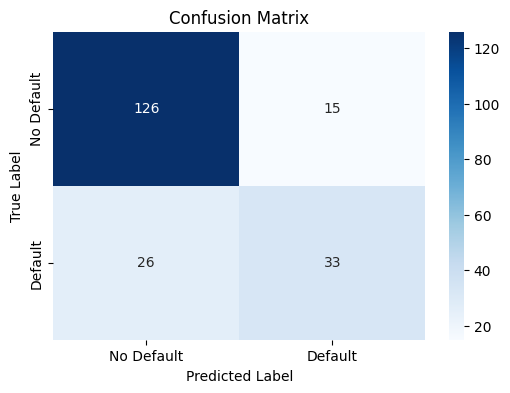

In [34]:
# prompt: Make a confusion matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already trained your model and made predictions (y_pred)

cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


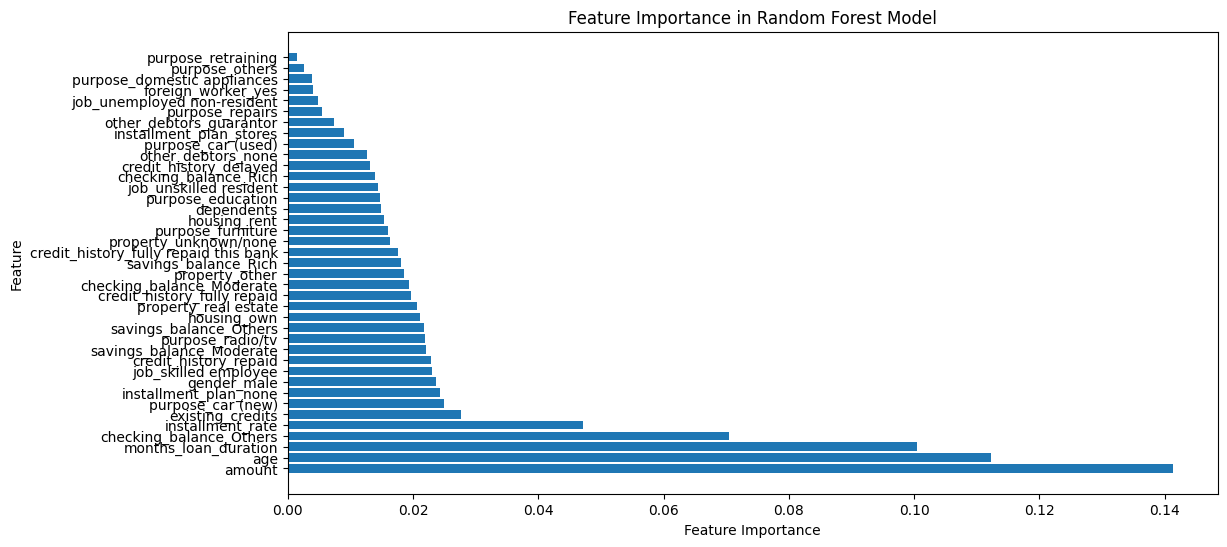

In [35]:
# prompt: Create a Feature of importance barchart

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Assuming you have your X_train and y_train data
# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier on your training data
rf_classifier.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Plot a bar chart of feature importances
plt.figure(figsize=(12, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest Model')
plt.show()


### Model Interpretation

Model Choice:
The logistic regression model is choice here due to the limited data size and in some cases obsserved linearity within the data. The **Chi Square model and the heatmap** shows there are some linear relationships between variables of this dataset and the default variable.

Result Interpration:

**Accuracy: 0.795 -** The model correctly predicts the defaulting behavior of approximately 79.5% of the loan applicants. While a good starting point, accuracy can be misleading with imbalanced datasets (more good loans than bad loans) as is the case in this dataset. Hence we use some more metrics: Precision, Recall, F1-Score


**Precision: 0.6875 -** Of the loans the model predicted would default, about 68.75% actually did. This is a good starting point for this model


**Recall: 0.5593 -** The model correctly identified 55.93% of the actual loan defaulters in the dataset. This suggests there's room for improvement in capturing all potential defaults.


**F1-Score: 0.6168 -** This score balances precision and recall. A measure of how well your model balances identifying actual defaulters (recall) while avoiding incorrectly flagging good loans as risky (precision).

**AUC Score: 0.7265 -** This is an indicator of a decent ability to distinguish between those who will default and those who won't. A higher AUC is generally better.



Recommendation
1. More data needs to be gotten to build a model that generalizes a lot better and captures more learnable patterns
2. The model needs to go through alpha-beta tests (Using model from Experiment 2 and 3). We could use more powerful models, however, class imbalance poses a challenge and data-size is also a limitation.
3. Some more detailed customer analytics should be done, to understand customer behaviors at a more granular level. These variables can be orchestrated as new features into the predictive model. Engineering new data points.

# Business Impact

### Highlights

* **Reduced Losses:** The model can help reduce potential losses from bad loans by identifying approximately 69% of actual defaulters (based on precision). This allows you to avoid lending to a significant portion of high-risk applicants.

* **Improved Efficiency:** Automating credit risk assessment with your model can streamline loan processing, leading to faster decisions and reduced operational costs.

### **Areas for Improvement:**

* **Missed Opportunities:** Out of all the loans the model predicted would default, 68.75% actually did default. This means roughly 31% of the loans flagged as high-risk by your model were actually good loans. This could lead to lost business.

* **Financial Risk:** : The model correctly identified 55.93% of the actual loan defaulters in the dataset. This means it missed about 44% of people who ended up defaulting on their loans. This poses a challenge on the propensity to lose money to potential defaulters